In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [44]:
class Region:
    def __init__(self, name,season_name, mean, mean2):
        self.name = name
        season_data = mean.get(season_name)
        region_data = season_data.get(name)
        lat_lon = region_data.axes[0].to_numpy()
        lat, lon = zip(*lat_lon)
        val = region_data.to_numpy()
        self.lat = lat
        self.lon = lon
        self.val = val
        self.mean_val = []
        self.mean_val = np.concatenate((self.mean_val, val), axis=None)
        self.mean = mean2.get(season_name).get(name)
        self.mean_val[self.mean_val >= 0] = self.mean
        
class Season:
    def __init__(self, name, mean, mean2):
        self.name = name
        self.regions = []
        region_names = mean2.get(name).axes[0].to_numpy()
        for reg in region_names:
            self.regions.append(Region(reg, name, mean, mean2))
        
        data = mean.get(name)
        lat_lon = data.axes[0].to_numpy()
        reg, lat, lon = zip(*lat_lon)
        val = data.to_numpy()
        self.lat = lat
        self.lon = lon
        self.val = val
        
    def combineAllValues(self):
        self.all_lat = []
        self.all_lon = []
        self.all_val = []
        self.all_val_mean = []
        
        for region in self.regions:
            self.all_lat = np.concatenate((self.all_lat, region.lat), axis=None)
            self.all_lon = np.concatenate((self.all_lon, region.lon), axis=None)
            self.all_val = np.concatenate((self.all_val, region.val), axis=None)
            self.all_val_mean = np.concatenate((self.all_val_mean, region.mean_val), axis=None)

def plot(lat, lon, val):
    fig, (ax1, ax2) = plt.subplots(1, 4)
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution='l', 
                lat_0=40.1872, lon_0=44.5152,
                width=0.6E6, height=0.6E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")

    m.scatter(lat, lon, latlon=True,
              c=val, s = 1,
              cmap='Reds', alpha=0.8)
    plt.colorbar(label=r'$({\rm NO2})$')
    plt.clim(0.0, np.max(val))
    
def plotSeasons(seasons):
    fig = plt.figure(figsize=(25,25))
    ax = fig.add_subplot(141)
    ax.set_title(seasons[0].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[0].all_lon, seasons[0].all_lat, latlon=True,
              c=seasons[0].all_val, s = 1,
              cmap='Reds', alpha=0.8)
    
    
    ax = fig.add_subplot(142)
    ax.set_title(seasons[1].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[0].all_lon, seasons[0].all_lat, latlon=True,
              c=seasons[0].all_val, s = 1,
              cmap='Reds', alpha=0.8)
    
    
    ax = fig.add_subplot(143)
    ax.set_title(seasons[2].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[0].all_lon, seasons[0].all_lat, latlon=True,
              c=seasons[0].all_val, s = 1,
              cmap='Reds', alpha=0.8)
    
    ax = fig.add_subplot(144)
    ax.set_title(seasons[3].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[0].all_lon, seasons[0].all_lat, latlon=True,
              c=seasons[0].all_val, s = 1,
              cmap='Reds', alpha=0.8)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.09)
    plt.colorbar(label=r'$NO_{2} (molec / cm^2)$', cax=cax)
    plt.savefig('seasons_fig4_v2.png', dpi=600, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

    
    
def plotSeasonsMean(seasons):
    fig = plt.figure(figsize=(25,25))
    ax = fig.add_subplot(141)
    ax.set_title(seasons[0].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[0].all_lon, seasons[0].all_lat, latlon=True,
              c=seasons[0].all_val_mean, s = 1,
              cmap='Reds', alpha=0.8)
    
    
    ax = fig.add_subplot(142)
    ax.set_title(seasons[1].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[1].all_lon, seasons[1].all_lat, latlon=True,
              c=seasons[1].all_val_mean, s = 1,
              cmap='Reds', alpha=0.8)
    
    ax = fig.add_subplot(143)
    ax.set_title(seasons[2].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[2].all_lon, seasons[2].all_lat, latlon=True,
              c=seasons[2].all_val_mean, s = 1,
              cmap='Reds', alpha=0.8)
    
    ax = fig.add_subplot(144)
    ax.set_title(seasons[3].name,fontsize=18)
    m = Basemap(projection='lcc', resolution='l', 
        lat_0=40.1872, lon_0=44.5152,
        width=0.4E6, height=0.4E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    m.readshapefile("shape/arm_admbnda_adm1_2019", "Armenia")
    m.scatter(seasons[3].all_lon, seasons[3].all_lat, latlon=True,
              c=seasons[3].all_val_mean, s = 1,
              cmap='Reds', alpha=0.8) 
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.09)
    plt.colorbar(label=r'$NO_{2} (molec / cm^2)$', cax=cax)
    plt.savefig('seasons_fig4_v1.png', dpi=600, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [45]:
df = pd.read_csv ('new_result_v2.csv')
df['lat_lon'] = list(zip(df.point_lat, df.point_lon))
df_excluded = df[(df['qa_value'] != 0) & (df['var'] >= 0.0)]

In [46]:
mean_by_points = df_excluded.groupby(['season','region','point_lat','point_lon'])["var"].mean()
mean_without_points_points = df_excluded.groupby(['season', 'region'])["var"].mean()

In [47]:
seasons = []
seasons.append(Season('winter',mean_by_points,mean_without_points_points))
seasons.append(Season('spring',mean_by_points,mean_without_points_points))
seasons.append(Season('summer',mean_by_points,mean_without_points_points))
seasons.append(Season('autumn',mean_by_points,mean_without_points_points))

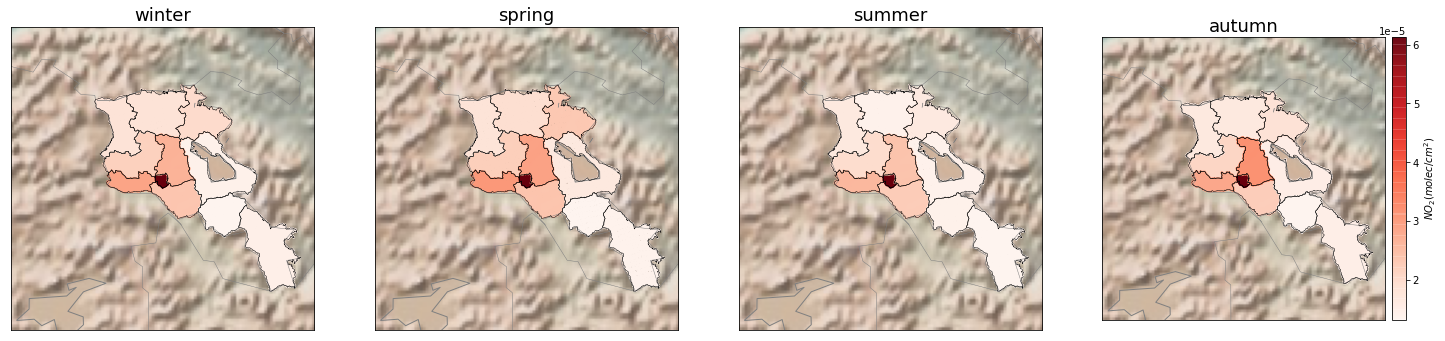

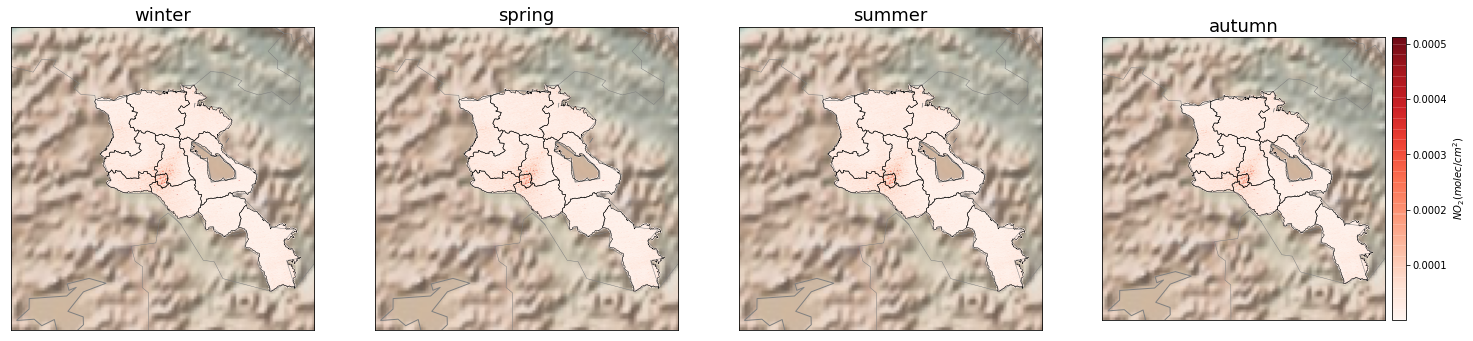

In [48]:
for season in seasons:
    season.combineAllValues()

plotSeasonsMean(seasons)
plotSeasons(seasons)

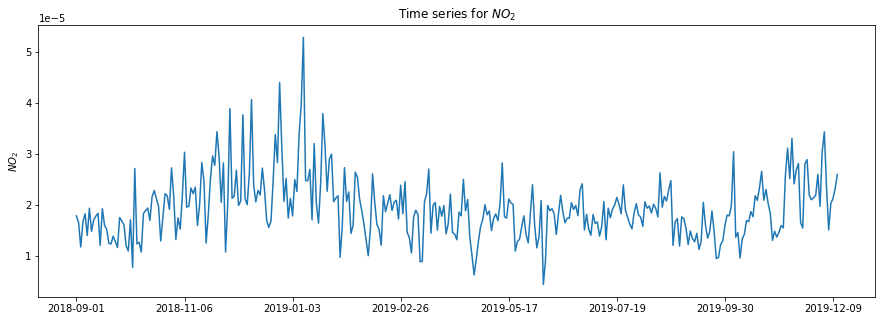

In [53]:
# TimeLine plot
timeseries = df_excluded.groupby(['time'])['var'].mean()
ax = timeseries.plot(kind="line",figsize=(15,5), title=r'Time series for $NO_{2}$',xlabel="", ylabel=r'$NO_{2}$') #,table=True
fig = ax.get_figure()
fig.savefig('timeseries.png', dpi=600, bbox_inches = 'tight', pad_inches = 0)

In [ ]:
from IPython.display import display
mean_of_armenia = df_excluded.groupby(['year'])["var"].mean()
mean_of_armenia_regions = df_excluded.groupby(['year', 'region'])["var"].mean()
print("The average for each year, Armenia")
display(pd.DataFrame(mean_of_armenia))

print("The average for each year, Armenian Regions")
display(pd.DataFrame(mean_of_armenia_regions))